In [1]:
conda install -c conda-forge iminuit

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - iminuit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    iminuit-2.6.1              |   py38h23ab428_0         339 KB
    ------------------------------------------------------------
                                           Total:         339 KB

The following packages will be UPDATED:

  iminuit                              2.6.0-py38h23ab428_0 --> 2.6.1-py38h23ab428_0



iminuit-2.6.1        | 339 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.315e+05                  │              Nfcn = 65               │
│ EDM = 1.58e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼─────────

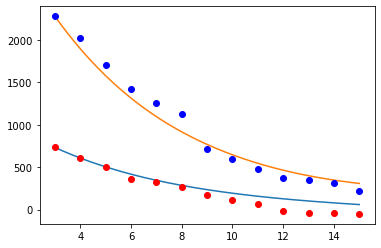

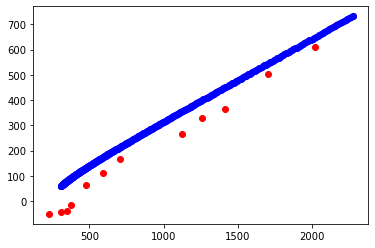

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy.optimize as sc
rc('animation', html='jshtml')

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)
def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

def custom_cost_function(g, r):
    res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=(g, r), t_eval=np.linspace(t[0], t[-1], len(t)))
    G0 = res.y[0]
    R0 = res.y[1]
    z = (G - G0)**2 + (R - R0)**2
    return np.sum(z)

m = Minuit(custom_cost_function, g=0.1, r=0.05)
m.errordef = 1
p=m.migrad()

res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=m.values, t_eval=np.linspace(t[0], t[-1], 400))

t0 = res.t
G0 = res.y[0]
R0 = res.y[1]

fig, ax = plt.subplots()
ax.plot(t0,G0)
ax.plot(t0,R0)
ax.plot(t,G,'ro')
ax.plot(t,R,'bo')
fig, ax = plt.subplots()
ax.plot(R,G,'ro')
ax.plot(R0,G0,'bo')
print(p)


<ipython-input-6-763f7fb3f8af>:40: RuntimeWarning: invalid value encountered in sqrt
  xO=np.sqrt((R**2/c)-1)


[8.38888954 7.42066795 6.23990108 5.15156521 4.55703875 4.04296695
 2.431847   1.95455509 1.44575105 0.98246021 0.83337139 0.55968446
        nan]
[8.38888954 6.86484897 5.61233191 4.58073665 3.73278926 3.03528335
 2.45782385 1.97486947 1.570028   1.22834594 0.93587395 0.67929357
 0.44823089]
0.7946854523507199
0.9999844839160952


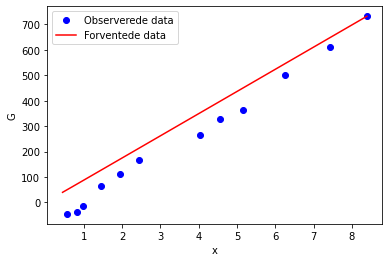

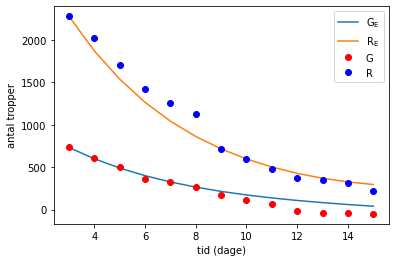

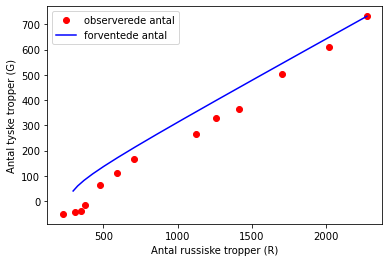

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy.optimize as sc
import scipy.stats as ss
rc('animation', html='jshtml')

from iminuit import Minuit
from iminuit.cost import LeastSquares

G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = np.array([2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224])
t = np.arange(3, 16)

def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

def GoF(g, r):
    res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=(g, r), t_eval=np.linspace(t[0], t[-1], len(t)))
    G0 = res.y[0]
    R0 = res.y[1]
    z1 = (G-G0)**2/G0
    z2 = (R-R0)**2/R0
    z  = np.append(z1,z2)
    return np.sum(z)

m = Minuit(GoF, g=573.48e-3, r=59.921e-3)
m.errordef = 1
q=m.migrad()

res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=m.values, t_eval=np.linspace(t[0], t[-1], 13))

t0 = res.t
G0 = res.y[0]
R0 = res.y[1]

c=4675/0.0643
xO=np.sqrt((R**2/c)-1)
print(xO)
xE=np.sqrt((R0**2/c)-1)
print(xE)
fig, ax = plt.subplots()
ax.plot(xO,G,'bo',label='Observerede data')
ax.plot(xE,G0,'r-',label='Forventede data')
ax.set_xlabel('x')
ax.set_ylabel('G')
ax.legend()

chmin=np.sum((xO[0:12]-xE[0:12])**2/xE[0:12])
print(chmin)
p = ss.chi2.sf(chmin,12-1)


fig, ax = plt.subplots()
ax.plot(t0,G0,label='$\mathrm{G_E}$')
ax.plot(t0,R0,label='$\mathrm{R_E}$')
ax.plot(t,G,'ro',label='G')
ax.plot(t,R,'bo',label='R')
ax.set_xlabel('tid (dage)')
ax.set_ylabel('antal tropper')
ax.legend()
fig, ax = plt.subplots()
ax.set_xlabel('Antal russiske tropper (R)')
ax.set_ylabel('Antal tyske tropper (G)')
ax.plot(R,G,'ro',label='observerede antal')
ax.plot(R0,G0,'b-',label='forventede antal')
ax.legend()
print(p)

In [7]:
nrep = 15
xmean = np.zeros(nrep)
for i in range(nrep):
    xmean[i] = np.mean(x3[np.random.randint(3,size=3)])
# 
bins = np.arange(0,10,1)
plt.hist(xmean,bins)
plt.xlabel("Middelværdi")
plt.ylabel("Hyppighed")
print(np.mean(xmean),np.std(xmean))



NameError: name 'x3' is not defined

[0. 0. 0. 0.]
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 3.        ,  3.03007519,  3.06015038,  3.09022556,  3.12030075,
        3.15037594,  3.18045113,  3.21052632,  3.2406015 ,  3.27067669,
        3.30075188,  3.33082707,  3.36090226,  3.39097744,  3.42105263,
        3.45112782,  3.48120301,  3.5112782 ,  3.54135338,  3.57142857,
        3.60150376,  3.63157895,  3.66165414,  3.69172932,  3.72180451,
        3.7518797 ,  3.78195489,  3.81203008,  3.84210526,  3.87218045,
        3.90225564,  3.93233083,  3.96240602,  3.9924812 ,  4.02255639,
        4.05263158,  4.08270677,  4.11278195,  4.14285714,  4.17293233,
        4.20300752,  4.23308271,  4.26315789,  4.29323308,  4.32330827,
        4.35338346,  4.38345865,  4.41353383,  4.44360902,  4.47368421,
        4.5037594 ,  4.53383459,  4.56390977,  4.59398496,  4.62406015,
        4.654135

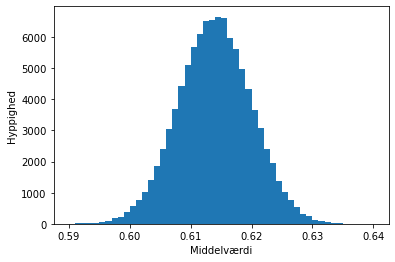

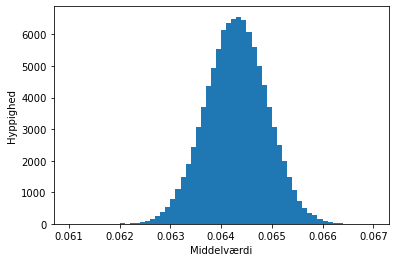

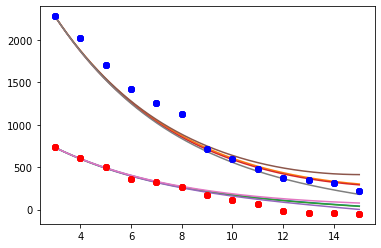

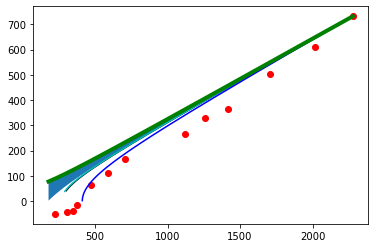

In [8]:
g=0.614 
r=64.3e-3
g_err=0.006
r_err=0.6e-3

import scipy.stats as ss
nrep = 100000

gmean=ss.norm.rvs(g,g_err,nrep)
rmean=ss.norm.rvs(r,r_err,nrep)

fig, ax =plt.subplots()
bins1 = np.arange(0.59,0.64,0.001)
ax.hist(gmean,bins1)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
fig, ax =plt.subplots()
bins2 = np.arange(0.061,0.067,0.0001)
ax.hist(rmean,bins2)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
gmin=np.mean(gmean)-np.std(gmean)
gmax=np.mean(gmean)+np.std(gmean)
rmin=np.mean(rmean)-np.std(rmean)
rmax=np.mean(rmean)+np.std(rmean)

G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)
def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

res=np.zeros(4)
print(res)

res1 = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[gmin,rmin], t_eval=np.linspace(t[0], t[-1], 400))
print(res1)
res2 = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[gmax,rmax], t_eval=np.linspace(t[0], t[-1], 400))
res3 = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[gmin,rmax], t_eval=np.linspace(t[0], t[-1], 400))
res4 = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[gmax,rmin], t_eval=np.linspace(t[0], t[-1], 400))

t01 = res1.t
G01 = res1.y[0]
R01 = res1.y[1]
fig, ax = plt.subplots()
ax.plot(t01,G01)
ax.plot(t01,R01)
ax.plot(t,G,'ro')
ax.plot(t,R,'bo')

t02 = res2.t
G02 = res2.y[0]
R02 = res2.y[1]
ax.plot(t02,G02)
ax.plot(t02,R02)
ax.plot(t,G,'ro')
ax.plot(t,R,'bo')

t03 = res3.t
G03 = res3.y[0]
R03 = res3.y[1]
ax.plot(t03,G03)
ax.plot(t03,R03)
ax.plot(t,G,'ro')
ax.plot(t,R,'bo')


t04 = res4.t
G04 = res4.y[0]
R04 = res4.y[1]
ax.plot(t04,G04)
ax.plot(t04,R04)
ax.plot(t,G,'ro')
ax.plot(t,R,'bo')


fig, ax = plt.subplots()
ax.plot(R,G,'ro')
ax.plot(R01,G01,'k')
ax.plot(R02,G02,'c')
ax.plot(R03,G03,'b')
ax.plot(R04,G04,'g',lw=4)
        
ax.fill_between(R04,G04,G03,alpha=1)


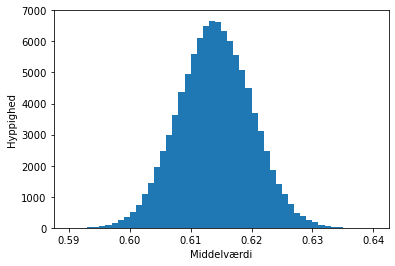

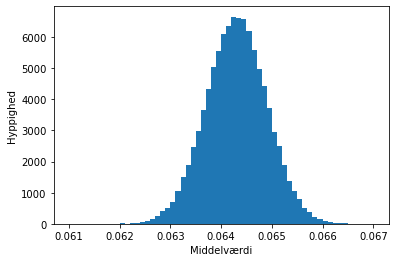

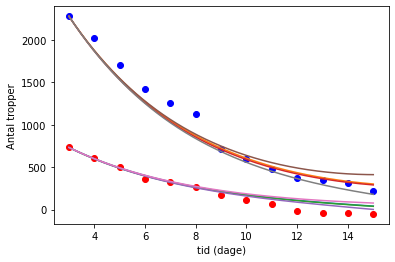

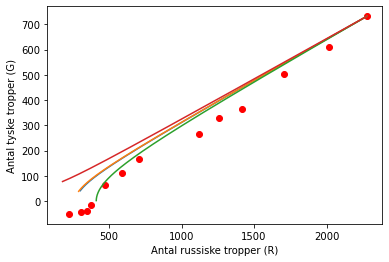

In [9]:
g=0.614 
r=64.3e-3
g_err=0.006
r_err=0.6e-3

import scipy.stats as ss
nrep = 100000

gmean=ss.norm.rvs(g,g_err,nrep)
rmean=ss.norm.rvs(r,r_err,nrep)

fig, ax =plt.subplots()
bins1 = np.arange(0.59,0.64,0.001)
ax.hist(gmean,bins1)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
fig, ax =plt.subplots()
bins2 = np.arange(0.061,0.067,0.0001)
ax.hist(rmean,bins2)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")

gmin=np.mean(gmean)-np.std(gmean)
gmax=np.mean(gmean)+np.std(gmean)
rmin=np.mean(rmean)-np.std(rmean)
rmax=np.mean(rmean)+np.std(rmean)

k=[[gmin,rmin],[gmax,rmax],[gmin,rmax],[gmax,rmin]]

G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)

def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

fig, ax1 = plt.subplots()
ax1.set_xlabel('tid (dage)')
ax1.set_ylabel('Antal tropper')
fig, ax2 = plt.subplots()
ax2.set_xlabel('Antal russiske tropper (R)')
ax2.set_ylabel('Antal tyske tropper (G)')
ax1.plot(t,G,'ro')
ax1.plot(t,R,'bo')
ax2.plot(R,G,'ro')

for i in [0,1,2,3]:
    res= solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=k[i], t_eval=np.linspace(t[0], t[-1], 400))
    t0 = res.t
    G0 = res.y[0]
    R0 = res.y[1]
    ax1.plot(t0,G0)
    ax1.plot(t0,R0)
    ax2.plot(R0,G0)
    

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 980.3                      │              Nfcn = 52               │
│ EDM = 1.12e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼─────────

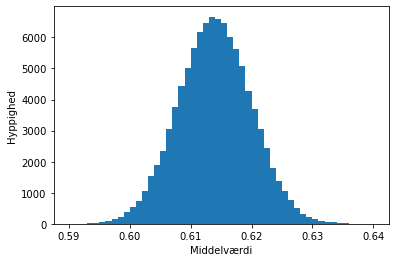

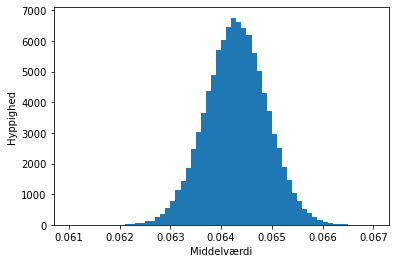

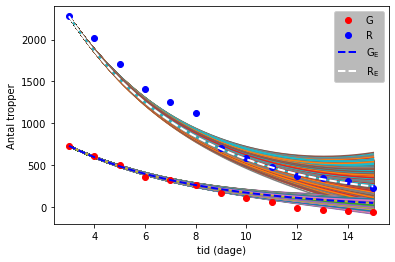

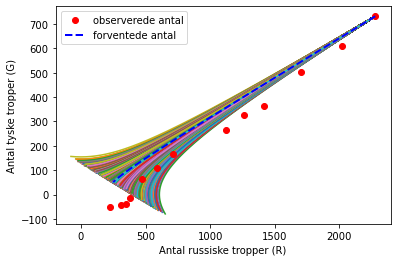

In [33]:
g=0.614 
r=64.3e-3
g_err=0.006
r_err=0.6e-3

import scipy.stats as ss
nrep = 100000

gmean=ss.norm.rvs(g,g_err,nrep)
rmean=ss.norm.rvs(r,r_err,nrep)
fig, ax =plt.subplots()
bins1 = np.arange(0.59,0.64,0.001)
ax.hist(gmean,bins1)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
fig, ax =plt.subplots()
bins2 = np.arange(0.061,0.067,0.0001)
ax.hist(rmean,bins2)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")

k=np.append(gmean,rmean)
G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)

def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

fig, ax1 = plt.subplots()
ax1.set_xlabel('tid (dage)')
ax1.set_ylabel('Antal tropper')
fig, ax2 = plt.subplots()
ax2.set_xlabel('Antal russiske tropper (R)')
ax2.set_ylabel('Antal tyske tropper (G)')

for i in range(nrep):
    res= solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[k[i],k[nrep+i]], t_eval=np.linspace(t[0], t[-1], 400))
    t0 = res.t
    G0 = res.y[0]
    R0 = res.y[1]
    ax1.plot(t0,G0)
    ax1.plot(t0,R0)
    ax2.plot(R0,G0)
    
ax1.plot(t,G,'ro',label='G')
ax1.plot(t,R,'bo',label='R')
ax2.plot(R,G,'ro',label='observerede antal')

#Observerede værdier
G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)

#Definering af koblede differentialligninger
def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

#Definering af goodness of fit parameter
def GoF(g, r):
    res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=(g, r), t_eval=np.linspace(t[0], t[-1], len(t)))
    G0 = res.y[0]
    R0 = res.y[1]
    z1 = (G-G0)**2/G0
    z2 = (R-R0)**2/R0
    z  = np.append(z1,z2)
    return np.sum(z)

#Fit vha. Minuit-kommando
m = Minuit(GoF, g=573.48e-3, r=59.921e-3)
m.errordef = 1
q=m.migrad()
print(q)

#Forventede værdier
t0 = res.t
G0 = res.y[0]
R0 = res.y[1]

#Plot af observerede- og forventede værdier
ax1.plot(t0,G0,'b--',lw=2,label='$\mathrm{G_E}$')
ax1.plot(t0,R0,'w--',lw=2,label='$\mathrm{R_E}$')
ax2.plot(R0,G0,'b--',lw=2,label='forventede antal')

ax1.legend(facecolor='darkgray')
ax2.legend()

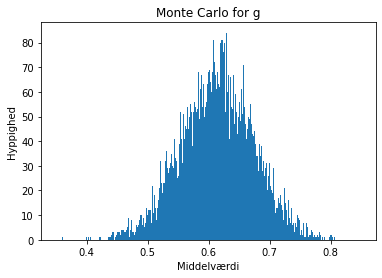

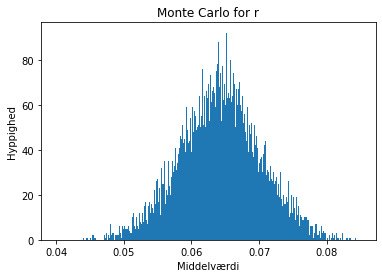

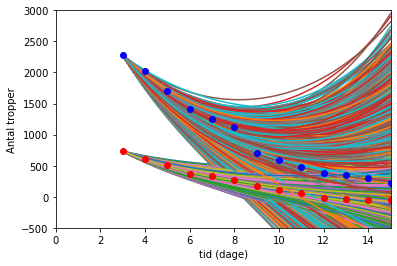

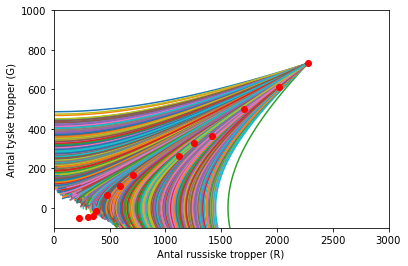

In [11]:
g=0.614 
r=64.3e-3
g_err=0.06
r_err=6e-3

import scipy.stats as ss
nrep = 10000

gmean=ss.norm.rvs(g,g_err,nrep)
rmean=ss.norm.rvs(r,r_err,nrep)
fig, ax =plt.subplots()
bins1 = np.arange(0.35,0.85,0.001)
ax.hist(gmean,bins1)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
ax.set_title('Monte Carlo for g')
fig, ax =plt.subplots()
bins2 = np.arange(0.04,0.085,0.0001)
ax.hist(rmean,bins2)
ax.set_xlabel("Middelværdi")
ax.set_ylabel("Hyppighed")
ax.set_title('Monte Carlo for r')
k=np.append(gmean,rmean)
G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)

def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

fig, ax1 = plt.subplots()
ax1.set_xlabel('tid (dage)')
ax1.set_ylabel('Antal tropper')
ax1.set_xlim(0,15)
ax1.set_ylim(-500,3000)
fig, ax2 = plt.subplots()
ax2.set_xlabel('Antal russiske tropper (R)')
ax2.set_ylabel('Antal tyske tropper (G)')
ax2.set_xlim(0,3000)
ax2.set_ylim(-100,1000)

for i in range(nrep):
    res= solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=[k[i],k[nrep+i]], t_eval=np.linspace(t[0], t[-1], 400))
    t0 = res.t
    G0 = res.y[0]
    R0 = res.y[1]
    ax1.plot(t0,G0)
    ax1.plot(t0,R0)
    ax2.plot(R0,G0)

ax1.plot(t,G,'ro')
ax1.plot(t,R,'bo')
ax2.plot(R,G,'ro')

0


(0.0, 1000.0)

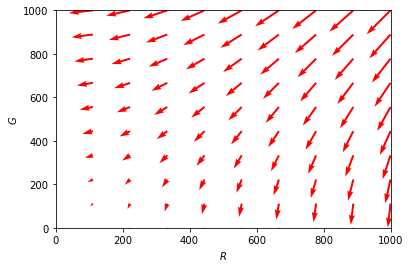

In [12]:
import numpy as np
import matplotlib.pyplot as plt

g=1
r=1
R0=1000
G0=1000
c=r*R0**2-g*G0**2
print(c)
def f(Y, t):
    R,G = Y
    return [-G,-np.sqrt((r*R**2-c)/g)]

G = np.linspace(0,1000,10)
R = np.linspace(0,1000,10)

Y1, Y2 = np.meshgrid(R, G)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$R$')
plt.ylabel('$G$')
plt.xlim([0,1000])
plt.ylim([0,1000])

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 980.3                      │              Nfcn = 52               │
│ EDM = 1.12e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼─────────

<ipython-input-13-279c778a7817>:41: RuntimeWarning: invalid value encountered in sqrt
  xO=np.sqrt((R**2/c)-1)


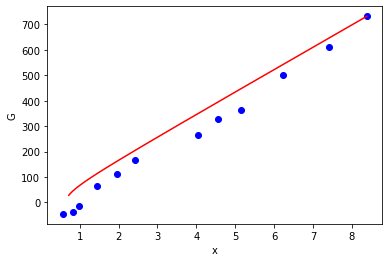

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy.optimize as sc
import scipy.stats as ss
rc('animation', html='jshtml')

from iminuit import Minuit
from iminuit.cost import LeastSquares

G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = np.array([2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224])
t = np.arange(3, 16)

#Fit til data
def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

def GoF(g, r):
    res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=(g, r), t_eval=np.linspace(t[0], t[-1], len(t)))
    G0 = res.y[0]
    R0 = res.y[1]
    z1 = (G-G0)**2/G0
    z2 = (R-R0)**2/R0
    z  = np.append(z1,z2)
    return np.sum(z)

m = Minuit(GoF, g=573.48e-3, r=59.921e-3)
m.errordef = 1
q=m.migrad()
print(q)

t0 = res.t
G0 = res.y[0]
R0 = res.y[1]

#Liniarisering
c=4675/0.0643
xO=np.sqrt((R**2/c)-1)
xE=np.sqrt((R0**2/c)-1)
fig, ax = plt.subplots()
ax.plot(xO,G,'bo',label='Observerede data')
ax.plot(xE,G0,'r-',label='Forventede data')
ax.set_xlabel('x')
ax.set_ylabel('G')

#Chi2 hypotesetest
chmin=np.sum((xO[0:12]-xE[0:12])**2/xE[0:12])
p = ss.chi2.sf(chmin,12-1)
print(chmin)
print(p)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 980.3                      │              Nfcn = 52               │
│ EDM = 1.12e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼─────────

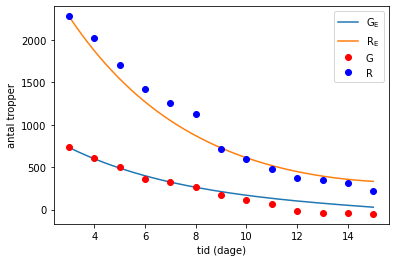

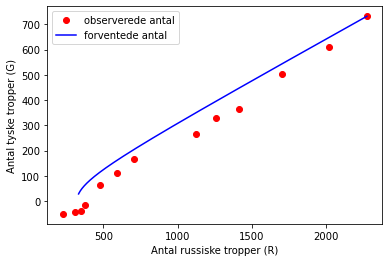

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy.optimize as sc
import scipy.stats as ss

from iminuit import Minuit
from iminuit.cost import LeastSquares

#Observerede værdier
G = [732, 611, 503, 364, 328, 265, 167, 110, 64, -15, -38, -45, -51]
R = [2278, 2019, 1704, 1415, 1258, 1123, 709, 592, 474, 378, 351, 309, 224]
t = np.arange(3, 16)

#Definering af koblede differentialligninger
def dydt(t, y, g, r):
    return [-r*y[1], -g*y[0]]

#Definering af goodness of fit parameter
def GoF(g, r):
    res = solve_ivp(dydt, [t[0], t[-1]], [G[0], R[0]], args=(g, r), t_eval=np.linspace(t[0], t[-1], len(t)))
    G0 = res.y[0]
    R0 = res.y[1]
    z1 = (G-G0)**2/G0
    z2 = (R-R0)**2/R0
    z  = np.append(z1,z2)
    return np.sum(z)

#Fit vha. Minuit-kommando
m = Minuit(GoF, g=573.48e-3, r=59.921e-3)
m.errordef = 1
q=m.migrad()
print(q)

#Forventede værdier
t0 = res.t
G0 = res.y[0]
R0 = res.y[1]

#Plot af observerede- og forventede værdier
fig, ax = plt.subplots()
ax.plot(t0,G0,label='$\mathrm{G_E}$')
ax.plot(t0,R0,label='$\mathrm{R_E}$')
ax.plot(t,G,'ro',label='G')
ax.plot(t,R,'bo',label='R')
ax.set_xlabel('tid (dage)')
ax.set_ylabel('antal tropper')
ax.legend()
fig, ax = plt.subplots()
ax.set_xlabel('Antal russiske tropper (R)')
ax.set_ylabel('Antal tyske tropper (G)')
ax.plot(R,G,'ro',label='observerede antal')
ax.plot(R0,G0,'b-',label='forventede antal')
ax.legend()